In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
data= pd.read_csv(r'C:\Users\ASHISH KUMAR\OneDrive\Desktop\Python\Deep Learning\Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X= data.iloc[:,3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [4]:
y= data.iloc[:, 13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [5]:
geography= pd.get_dummies(X['Geography'],drop_first= True)
gender= pd.get_dummies(X['Gender'],drop_first= True)

In [6]:
X= pd.concat([X,geography,gender],axis=1)
X.shape

(10000, 13)

In [7]:
X= X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
len(X_train)

6700

In [10]:
len(X_test)

3300

In [11]:
# Featurer Scaling
sc= StandardScaler()
sc

StandardScaler()

In [12]:
X_train= sc.fit_transform(X_train)

In [13]:
X_test= sc.fit_transform(X_test)

# Now lets make ANN

importing ther keras library and package

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
classifier= Sequential()

In [16]:
# adding the first hidden layer and input layer
classifier.add(Dense(units=6, kernel_initializer= 'he_uniform',activation= 'relu',input_dim= 11))

C:\Users\ASHISH KUMAR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# adding the second input layer
classifier.add(Dense(units=6, kernel_initializer= 'he_uniform',activation= 'relu'))

In [18]:
# adding the output layer
classifier.add(Dense(units=1, kernel_initializer= 'glorot_uniform',activation= 'sigmoid'))

In [19]:
# compile the ANN
classifier.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics= ['accuracy'])

In [20]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# fitting the ann to the training set
model_history= classifier.fit(X_train, y_train, validation_split= 0.33,batch_size= 10,epochs= 100)

Epoch 1/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6356 - loss: 0.7104 - val_accuracy: 0.7884 - val_loss: 0.5056
Epoch 2/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7942 - loss: 0.4959 - val_accuracy: 0.8024 - val_loss: 0.4693
Epoch 3/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8041 - loss: 0.4633 - val_accuracy: 0.8232 - val_loss: 0.4481
Epoch 4/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8068 - loss: 0.4523 - val_accuracy: 0.8255 - val_loss: 0.4422
Epoch 5/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8180 - loss: 0.4367 - val_accuracy: 0.8237 - val_loss: 0.4370
Epoch 6/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8150 - loss: 0.4372 - val_accuracy: 0.8282 - val_loss: 0.4368
Epoch 7/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8151 - loss: 0.4337 - val_accuracy: 0.8287 - val_loss: 0.4342
Epoch 8/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8229 - loss: 0.4157 - val_accu

449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8606 - loss: 0.3352 - val_accuracy: 0.8472 - val_loss: 0.3612
Epoch 52/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8619 - loss: 0.3281 - val_accuracy: 0.8490 - val_loss: 0.3620
Epoch 53/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8544 - loss: 0.3518 - val_accuracy: 0.8463 - val_loss: 0.3609
Epoch 54/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.3234 - val_accuracy: 0.8467 - val_loss: 0.3610
Epoch 55/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3362 - val_accuracy: 0.8467 - val_loss: 0.3604
Epoch 56/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8575 - loss: 0.3370 - val_accuracy: 0.8467 - val_loss: 0.3603
Epoch 57/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8646 - loss: 0.3333 - val_accuracy: 0.8472 - val_loss: 0.3606
Epoch 58/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8626 - loss: 0.3233 - val_accuracy:

In [22]:
# list all the data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


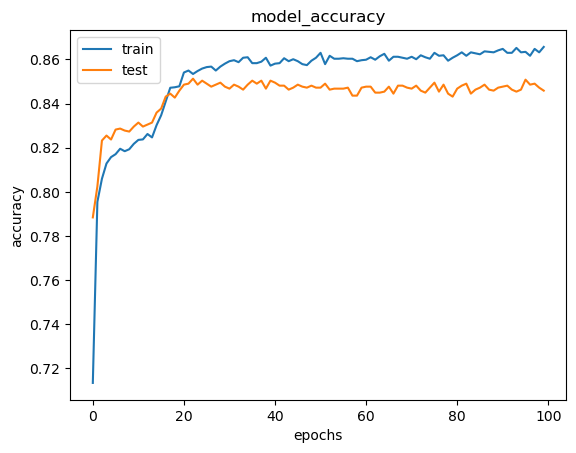

In [23]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['train','test'],loc= 'upper left')
plt.show()

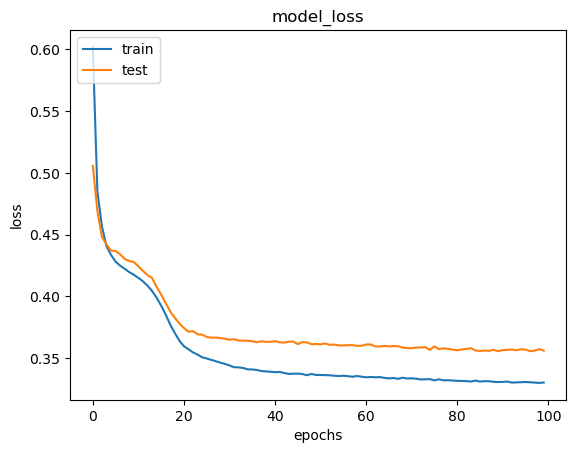

In [24]:
# summarize the histoery for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['train','test'],loc= 'upper left')
plt.show()

In [25]:
# part 3 
#making the prediction and evaluating the model
# prediction the test result

y_pred= classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [26]:
cm= confusion_matrix(y_pred,y_test)
cm

array([[2531,  322],
       [ 126,  321]], dtype=int64)

In [27]:
score= accuracy_score(y_pred,y_test)
score

0.8642424242424243